<a href="https://colab.research.google.com/github/dhruvi013/Machine-Learning/blob/main/PL_KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
from ucimlrepo import fetch_ucirepo
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
adult = fetch_ucirepo(id=2)

# data (as pandas dataframes)
X = adult.data.features
y = adult.data.targets

# metadata
print(adult.metadata)

# variable information
print(adult.variables)


{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether annual income of an individual exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Tue Sep 24 2024', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': "Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the fol

In [ ]:
# Handle missing values and encode categorical variables
# Define a column transformer with one hot encoding for categorical columns
# and imputation for missing data
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('encoder', OneHotEncoder(handle_unknown='ignore'))
        ]), X.select_dtypes(include=['object']).columns),  # Apply to categorical columns
        ('num', StandardScaler(), X.select_dtypes(include=['number']).columns)  # Apply StandardScaler to numeric columns
    ])

In [ ]:
# Apply the transformations and fit the model
X_processed = preprocessor.fit_transform(X)

In [ ]:
# Apply KMeans clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_processed)

KMeans(n_clusters=2, random_state=42)

In [ ]:
# Get the cluster centers and labels
cluster_centers = kmeans.cluster_centers_
labels = kmeans.labels_


In [ ]:
# Add the cluster labels to the original data for analysis
X['Cluster'] = labels

In [ ]:
# Print out cluster centers
print("Cluster Centers:")
print(cluster_centers)

Cluster Centers:
[[ 3.81933269e-02  2.89668491e-02  6.35983264e-02  2.14569252e-04
   7.16296535e-01  3.34084326e-02  7.82319494e-02  4.06608733e-02
   4.29138504e-04  2.89453921e-02  3.78071022e-02  1.38611737e-02
   5.17111898e-03  1.05782641e-02  1.98691128e-02  1.59210385e-02
   3.27218110e-02  4.25490827e-02  1.60948396e-01  1.12863427e-02
   3.26295462e-01  5.22690698e-02  1.73801094e-03  1.58781247e-02
   2.24160498e-01  1.37410149e-01  7.50992383e-04  4.49973179e-01
   1.30243536e-02  3.35500483e-01  3.19708186e-02  3.13700247e-02
   3.83435254e-02  1.16425276e-01  3.00396953e-04  1.25458642e-01
   1.21167257e-01  3.09838000e-02  4.33000751e-02  6.26542217e-02
   1.03250724e-01  5.08529128e-03  1.43096234e-01  2.01265959e-02
   1.12048064e-01  2.93745306e-02  4.83853664e-02  3.96094840e-01
   2.58985087e-01  3.14773093e-02  1.58824160e-01  1.07670851e-01
   4.69477524e-02  9.87018560e-03  3.09623431e-02  9.72427851e-02
   8.41111469e-03  8.53513572e-01  3.36230018e-01  6.637699

In [ ]:
# Print out some basic statistics about the clusters
print("Cluster Labels Distribution:")
print(pd.Series(labels).value_counts())

Cluster Labels Distribution:
0    46605
1     2237
Name: count, dtype: int64


In [ ]:
# Reduce the dimensions to 2 using PCA for visualization
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_processed)


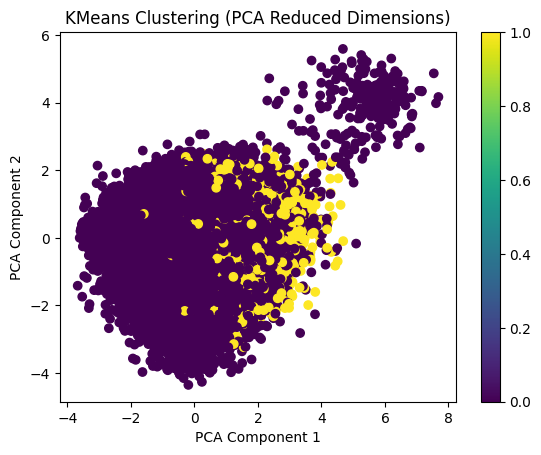

In [ ]:
# Plot the clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis')
plt.title('KMeans Clustering (PCA Reduced Dimensions)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar()  # To show color bar representing clusters
plt.show()